# <center>Netflix - movies and TV shows</center>
<p> This dataset consists of tv shows and movies available on Netflix as of 2019.  </p>

In [1]:
#Load required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.lines as  lines
from IPython.display import HTML
from wordcloud import WordCloud
import datetime
from tqdm import tqdm
from pandas import option_context  #for changing the display column width of dataframe
import calendar

In [2]:
#Visualization settings
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize': (12,7),
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},
    font_scale=1.5)
custom_colors=["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)
background_color='#fbfbfb'

In [3]:
#Read datafile
df_input=pd.read_csv('netflix_titles.csv')

In [4]:
print ("\nSample dataframe\n")
display(df_input.head(3))
print (f"Dataframe shape: {df_input.shape}\n")
col_tags="<ol><b>" + "".join([f"<li>{col}</li>" for col in df_input.columns]) + "</b></ol>"
display(HTML("<b><u>Feature names</u></b>"))
display(HTML(col_tags))
print ("Dataset summary")
display (df_input.info())


Sample dataframe



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


Dataframe shape: (7787, 12)



Dataset summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


None

<h3 style="background-color:yellow">
    11 String features and 1 integer feature.
    </h3>

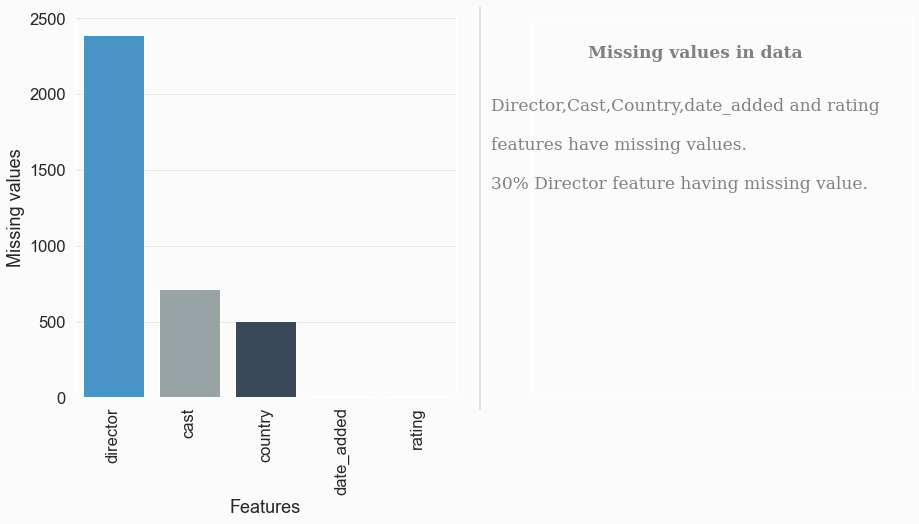

,Features,Missing values
0,director,2389
1,cast,718
2,country,507
3,date_added,10
4,rating,7


In [5]:
#Data frame for missing values
val=df_input.isnull().sum()
val.sort_values(inplace=True, ascending=False)
df=pd.DataFrame(columns=["Features","Missing values"])
df["Features"]=val.index
df["Missing values"]=val.values
df.drop(df[df["Missing values"]==0].index, inplace=True)

#Create plot for missing values 
fig=plt.figure(figsize=(15,7));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
#ax0.set_title("Missing values in data")
ax1.set_facecolor(background_color)

sns.barplot(data=df,x="Features",y="Missing values",ax=ax0);
#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)

#Draw line in the middle    
l1= lines.Line2D([0.5,0.5],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#Description
fig.text(x=0.6,
        y=0.8,
        s="Missing values in data",
        fontweight='bold',
        fontfamily='serif',
         fontsize=17,
        color='grey')
fig.text(x=0.47,
        y=0.5,
        fontweight='light',
        fontfamily='serif',
         fontsize=17,
        color='grey',
        s='''
        Director,Cast,Country,date_added and rating\n
        features have missing values.\n
        30% Director feature having missing value.
        ''')
plt.show()

display(df)

## <center>Exploratory Data Analysis</center>

In [6]:
#Discrete feature analysis
def analyze_discrete_feature(fld,display_graph=True):
    print ("Sample data:\n")
    display(fld.head())
    df=pd.DataFrame({"Value": fld.value_counts().index,
                 "Count":fld.value_counts().values})
    print ("\nNull value count : ", fld.isnull().sum())
    unique_list=fld.unique().tolist()
    print ("\nUnique values: ", unique_list)
    print ("\n Unique values count: ", len(unique_list))
    print ("\nValue counts:\n",    df)
    print (display_graph)
    if display_graph==True:
        plt.subplots(figsize=(25,10),facecolor=background_color)
        plt.subplot(2,2,1)
        plt.pie(fld.value_counts(),labels=fld.value_counts().index,autopct=lambda x: f'{x: .2f}%');
        plt.xticks(rotation=90)

        plt.subplot(2,2,2)   
        sns.barplot(data=df, x="Value",y="Count").set_facecolor(background_color);
        plt.xticks(rotation=90);
        plt.suptitle(fld.name + " -distribution");

        plt.show()
        plt.close()
    display(HTML("<h4 style='background-color:#fbfbfb;font-family:serif;font-size:160%'>Discrete variable</h4>"))

In [7]:
#Continuous feature analysis
def analyze_continuous_feature(fld):
    print ("Null value count : ", fld.isnull().sum())
    print ("\n", fld.describe())
    plt.subplots(figsize=(25,10))
    plt.subplot(2,2,1)
    plt.hist(fld)
    plt.subplot(2,2,2)
    sns.boxplot(fld)
    plt.suptitle("fld.name + -distribution")
    plt.show()
    plt.close()
    display(HTML("<h4 style='background-color:#fbfbfb;font-family:serif;font-size:160%'>Continuous variable</h4>"))

### 1. show_id

In [8]:
print ("Sample data:\n")
display(df_input.show_id.head())

Sample data:



0    s1
1    s2
2    s3
3    s4
4    s5
Name: show_id, dtype: object

<h4 style='background-color:#fbfbfb;font-family:serif;font-size:160%'>Just row identifier for columns.</h4>


### 2. Type

Sample data:



0    TV Show
1      Movie
2      Movie
3      Movie
4      Movie
Name: type, dtype: object


Null value count :  0

Unique values:  ['TV Show', 'Movie']

 Unique values count:  2

Value counts:
      Value  Count
0    Movie   5377
1  TV Show   2410
True


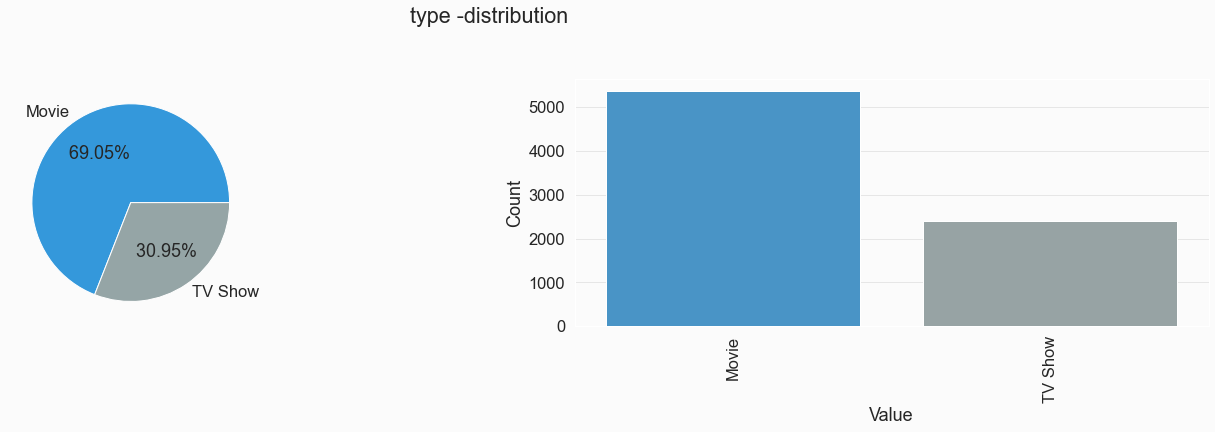

In [9]:
analyze_discrete_feature(df_input.type)

### 3. Title

In [10]:
display(df_input.title)

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%">
Title of the show. String discrete feature.</h3>

### 4. Director


 Sample data: 



1    Jorge Michel Grau
2         Gilbert Chan
3          Shane Acker
4       Robert Luketic
5          Serdar Akar
Name: director, dtype: object

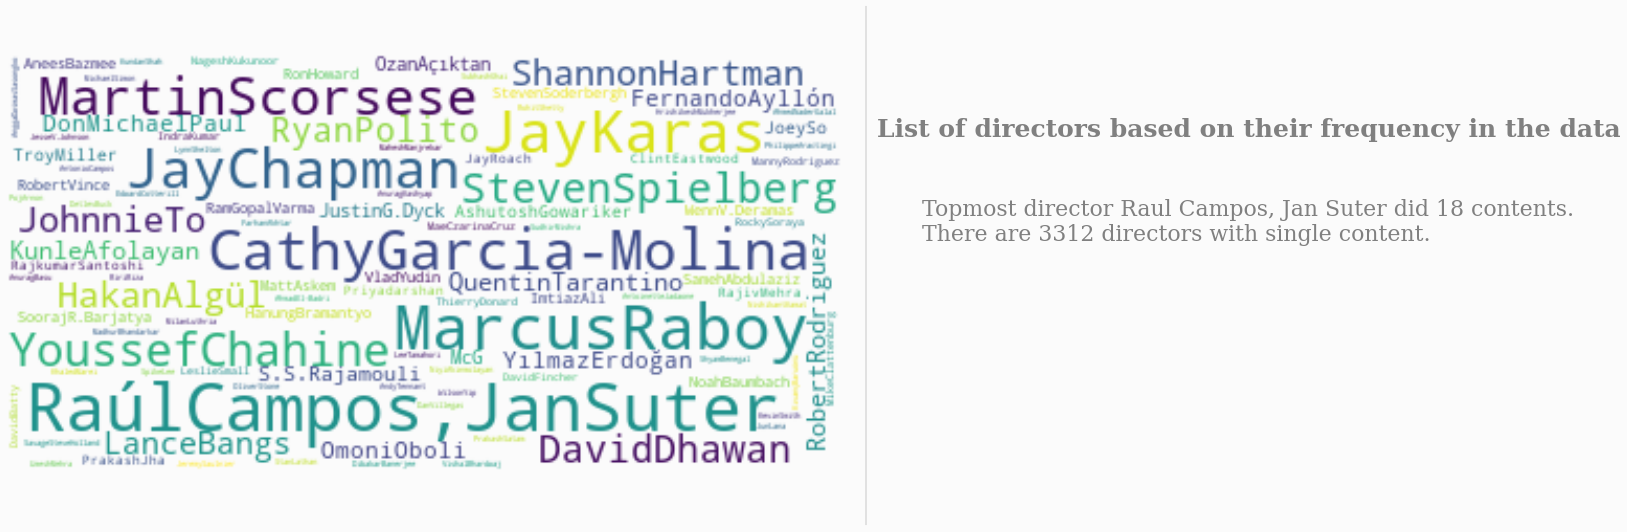

In [11]:
print ("\n Sample data: \n")
display (df_input.director.dropna().head())
#Get the series of director names.
director_names=df_input.director.dropna().copy()

director_names=director_names.apply(lambda x: x.replace(" ",""))
director_names=director_names.value_counts()
#Create a dictionary with director names and count of video contents.
director_counts={}
for item in director_names.iteritems():
    director_counts[item[0]]=item[1]
    
wc=WordCloud(background_color=background_color).generate_from_frequencies(director_counts)

fig=plt.figure(figsize=(15,9),facecolor=background_color)
gs= fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.5)
ax0=fig.add_subplot(gs[0,0])
ax0.set_facecolor(background_color)
ax0.imshow(wc,interpolation='bilinear')
ax0.axis('off')
#Draw a seperation line
l1=lines.Line2D([0.92,0.92],[0.1,0.9], transform=fig.transFigure,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(x=0.93,y=0.7,
         s="List of directors based on their frequency in the data",
         fontsize=25,fontfamily='serif',color='grey',fontweight='bold')
fig.text(x=0.92,
        y=0.5,
        fontweight='light',
        fontfamily='serif',
        fontsize=22,
        color='grey',
        s='''
        Topmost director Raul Campos, Jan Suter did 18 contents.
        There are 3312 directors with single content.
        ''')
fig.tight_layout(pad=0)
fig.patch.set_facecolor(background_color)
plt.show()
#Display director names and counts
#display(pd.DataFrame(director_names).rename(columns={'director':'Count'}))
#dir_count=pd.DataFrame(director_names).rename(columns={'director':'Count'})
#display (dir_count.value_counts())

### 5. Cast

In [12]:
print ("Sample data:\n")
display (df_input.cast.dropna().head())

Sample data:



0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

In [13]:
actor_list=[]
cast=df_input.cast.dropna().copy()
#Convert to lower letters
cast=cast.apply(lambda x : x.lower())

#Create list of actors
for item in cast:
    actor_list.extend(item.split(','))
#remove duplicate actors    
actor_list=list(set(actor_list))
print (f"Number of actors: {len(actor_list)}")
#Create a dictionary for storing count
actor_dict={}
for actor in actor_list:
    actor_dict[actor]=0
#Iterate through series and find the count
for actor in cast:
    for x in actor.split(','):
        actor_dict[x]+=1
actors_count=pd.Series(actor_dict)
actors_count.sort_values(ascending=False,inplace=True)


Number of actors: 35364


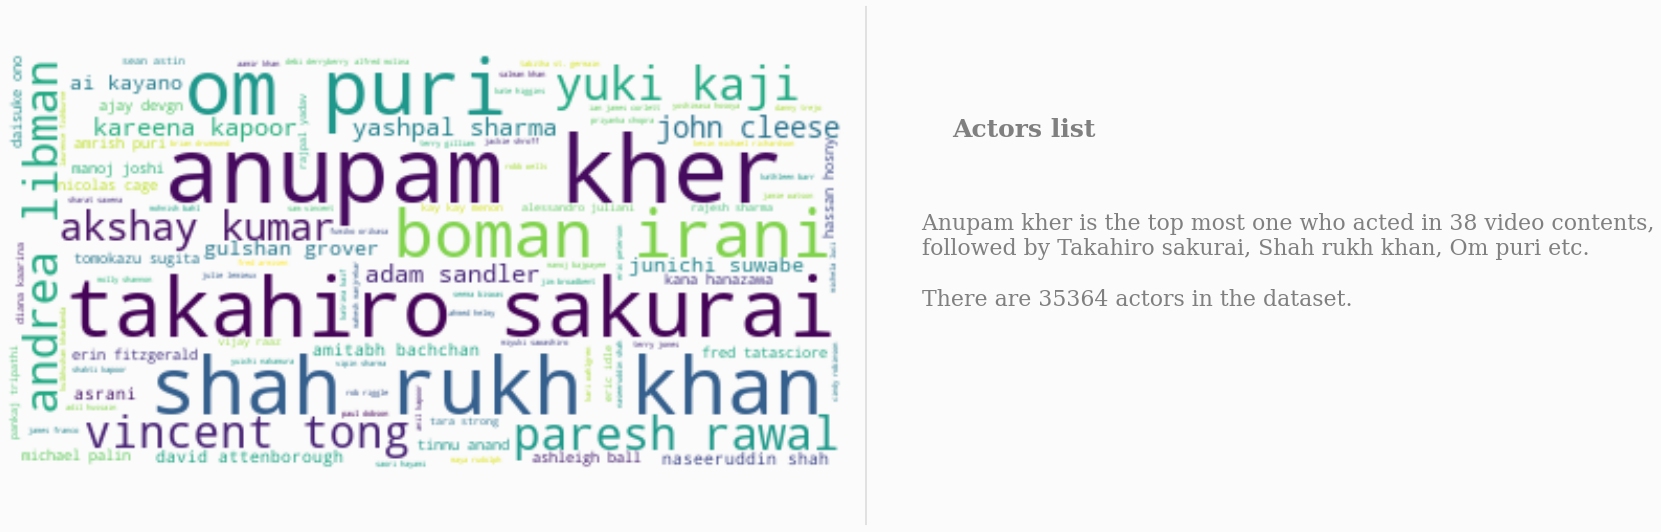


Top most actors based on content count:



 anupam kher         38
 takahiro sakurai    28
 om puri             27
shah rukh khan       27
 boman irani         25
dtype: int64

In [14]:
wc=WordCloud(background_color=background_color).generate_from_frequencies(actor_dict)

fig=plt.figure(figsize=(15,9),facecolor=None)
gs= fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.5)
ax0=fig.add_subplot(gs[0,0])
ax0.set_facecolor(background_color)
ax0.imshow(wc,interpolation='bilinear')
ax0.axis('off')
#Draw a seperation line
l1=lines.Line2D([0.92,0.92],[0.1,0.9], transform=fig.transFigure,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(x=1,y=0.7,
         s="Actors list",
         fontsize=25,fontfamily='serif',color='grey',fontweight='bold')
fig.text(x=0.92,
        y=0.4,
        fontweight='light',
        fontfamily='serif',
        fontsize=22,
        color='grey',
        s='''
        Anupam kher is the top most one who acted in 38 video contents,
        followed by Takahiro sakurai, Shah rukh khan, Om puri etc.\n
        There are 35364 actors in the dataset.
        ''')
fig.tight_layout(pad=0)
fig.patch.set_facecolor(background_color)
plt.show()
print ("\nTop most actors based on content count:\n")
display(actors_count.head())

### 6. Country

In [15]:
print ("Sample data:\n")
display(df_input.country.head(5))

Sample data:



0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: country, dtype: object

In [16]:
country=df_input.country.dropna().copy()
country = country.apply(lambda x: x.lower().strip())

country_list=[]
for item in country:
    country_list.extend(item.split(','))
country_list=list(set(country_list))

#Dictionary for storing the count
country_dict={}
for ctry in country_list:
    country_dict[ctry]=0

#Iterate through the series for updating the count
for ctry in country:
    for x in ctry.split(','):
        country_dict[x]+=1
country_dict.pop('')

country_count=pd.Series(country_dict)
country_count.sort_values(ascending=False, inplace=True)

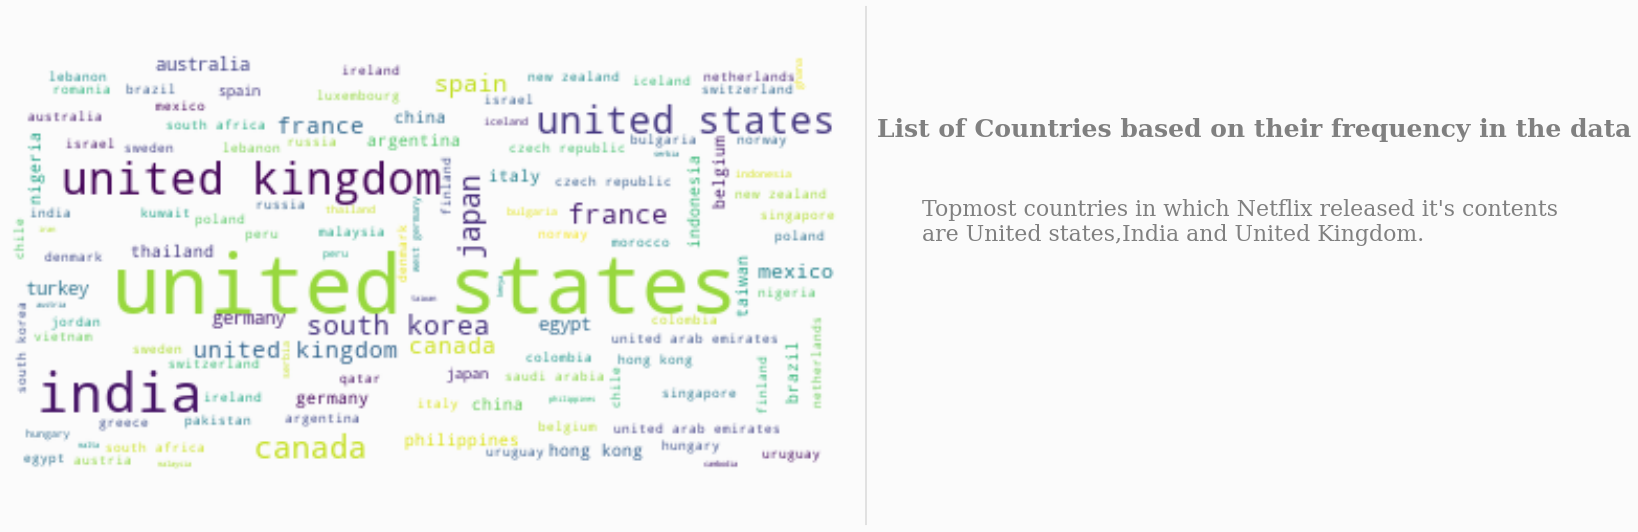


Top most countries based on count:



united states     2883
india              956
united kingdom     577
 united states     414
canada             259
                  ... 
 slovakia            1
iran                 1
 east germany        1
cyprus               1
 ukraine             1
Length: 187, dtype: int64


Unique country count: 187


In [17]:
wc=WordCloud(background_color=background_color).generate_from_frequencies(country_dict)


fig=plt.figure(figsize=(15,9),facecolor=None)
gs= fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.5)
ax0=fig.add_subplot(gs[0,0])
ax0.set_facecolor(background_color)
ax0.imshow(wc,interpolation='bilinear')
ax0.axis('off')
#Draw a seperation line
l1=lines.Line2D([0.92,0.92],[0.1,0.9], transform=fig.transFigure,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(x=0.93,y=0.7,
         s="List of Countries based on their frequency in the data",
         fontsize=25,fontfamily='serif',color='grey',fontweight='bold')
fig.text(x=0.92,
        y=0.5,
        fontweight='light',
        fontfamily='serif',
        fontsize=22,
        color='grey',
        s='''
        Topmost countries in which Netflix released it's contents
        are United states,India and United Kingdom.
        ''')
fig.tight_layout(pad=0)
fig.patch.set_facecolor(background_color)
plt.show()

print ("\nTop most countries based on count:\n")
display(country_count)
print (f"\nUnique country count: {len(country_dict)}")

### 7. Date_Added

In [18]:
print ("Sample data:\n", df_input.date_added.dropna().head())


Sample data:
 0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
Name: date_added, dtype: object


Sample data:



0    2020
1    2016
2    2018
3    2017
4    2020
Name: YearAdded, dtype: int64


Null value count :  0

Unique values:  [2020, 2016, 2018, 2017, 2019, 2021, 2015, 2013, 2011, 2012, 2014, 2008, 2009, 2010]

 Unique values count:  14

Value counts:
     Value  Count
0    2019   2153
1    2020   2009
2    2018   1685
3    2017   1225
4    2016    443
5    2021    117
6    2015     88
7    2014     25
8    2011     13
9    2013     11
10   2012      3
11   2009      2
12   2008      2
13   2010      1
True


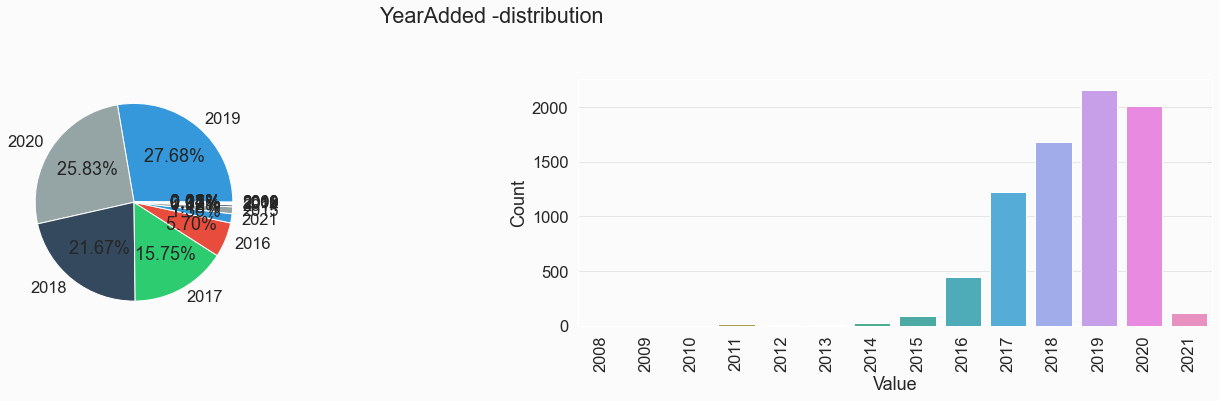

In [19]:
date_added=df_input.date_added.dropna().copy()
#Convert date from string to DateTime format
date_added=date_added.apply(lambda x: datetime.datetime.strptime(x.strip(),"%B %d, %Y"))
df=pd.DataFrame(date_added)
#Get the years from date
df["YearAdded"]=df.date_added.apply(lambda x: x.year)
#Get the statistics for the year added
analyze_discrete_feature(df.YearAdded)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    Maximum of the contents are added in 2019. <br>
    88% percent of the contents are added during 2017 to 2020.<br>
    Data is available from 2008 to 2021.
    </h4>

### 8. Release Year

Sample data:



0    2020
1    2016
2    2011
3    2009
4    2008
Name: release_year, dtype: int64


Null value count :  0

Unique values:  [2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015, 2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971, 1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974, 2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975, 2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965, 1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963, 1964, 1954, 1970, 1944, 1947, 1959, 1943]

 Unique values count:  73

Value counts:
     Value  Count
0    2018   1121
1    2017   1012
2    2019    996
3    2016    882
4    2020    868
..    ...    ...
68   1966      1
69   1947      1
70   1959      1
71   1964      1
72   1925      1

[73 rows x 2 columns]
True


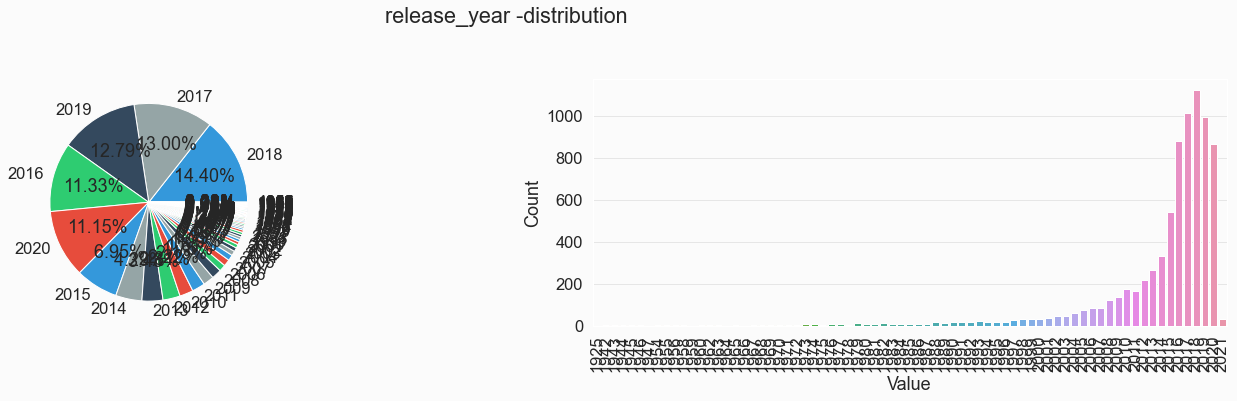

In [20]:
analyze_discrete_feature(df_input.release_year)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    Release_year is ranging from 1925 to 2021. <br>
    2018 has got the maximum contents released.<br>
    </h4>

### 9. Rating

Sample data:



0    TV-MA
1    TV-MA
2        R
3    PG-13
4    PG-13
Name: rating, dtype: object


Null value count :  7

Unique values:  ['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan, 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR']

 Unique values count:  15

Value counts:
        Value  Count
0      TV-MA   2863
1      TV-14   1931
2      TV-PG    806
3          R    665
4      PG-13    386
5       TV-Y    280
6      TV-Y7    271
7         PG    247
8       TV-G    194
9         NR     84
10         G     39
11  TV-Y7-FV      6
12        UR      5
13     NC-17      3
True


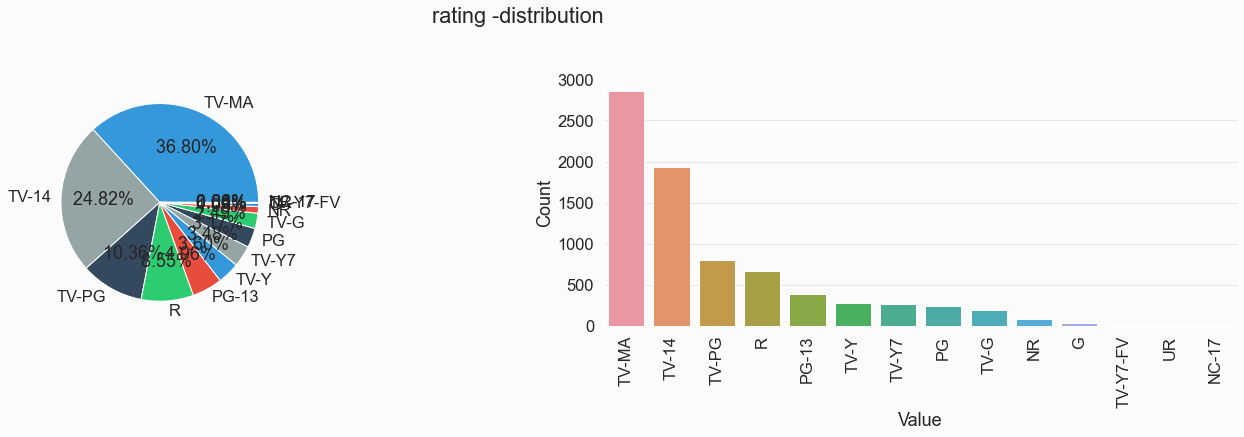

In [21]:
analyze_discrete_feature(df_input.rating)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    14 types of ratings are available in the data. <br>
    TV-MA (Mature Audience Only) type of the rating is the max count of rating, which included 36.8% ratings in the data.
    </h4>

### 10. Duration

In [22]:
analyze_discrete_feature(df_input.duration,display_graph=False)

Sample data:



0    4 Seasons
1       93 min
2       78 min
3       80 min
4      123 min
Name: duration, dtype: object


Null value count :  0

Unique values:  ['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season', '95 min', '119 min', '118 min', '143 min', '103 min', '89 min', '91 min', '149 min', '144 min', '124 min', '87 min', '110 min', '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min', '90 min', '102 min', '104 min', '105 min', '56 min', '125 min', '81 min', '97 min', '106 min', '107 min', '109 min', '44 min', '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min', '130 min', '94 min', '140 min', '135 min', '82 min', '70 min', '121 min', '92 min', '164 min', '53 min', '83 min', '116 min', '86 min', '120 min', '96 min', '126 min', '129 min', '77 min', '137 min', '148 min', '28 min', '122 min', '176 min', '85 min', '22 min', '68 min', '111 min', '29 min', '142 min', '168 min', '21 min', '59 min', '20 min', '98 min', '108 min', '76 min', '26 min', '156 min', '30 min', '57 min', '150 min', '133 min', '115 min', '154 min', '127 min', '146 min', '136 min', '88 min', '

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    There are 216 different types of duration types are available in the data.<br>
    '1 Season' duration got the maximum count in dataset.
    </h4>
    

### 11. Listed in

In [23]:
df_input.listed_in

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
                              ...                        
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
7784    Documentaries, International Movies, Music & M...
7785                   International TV Shows, Reality TV
7786                      Documentaries, Music & Musicals
Name: listed_in, Length: 7787, dtype: object

Number of listed_in :73


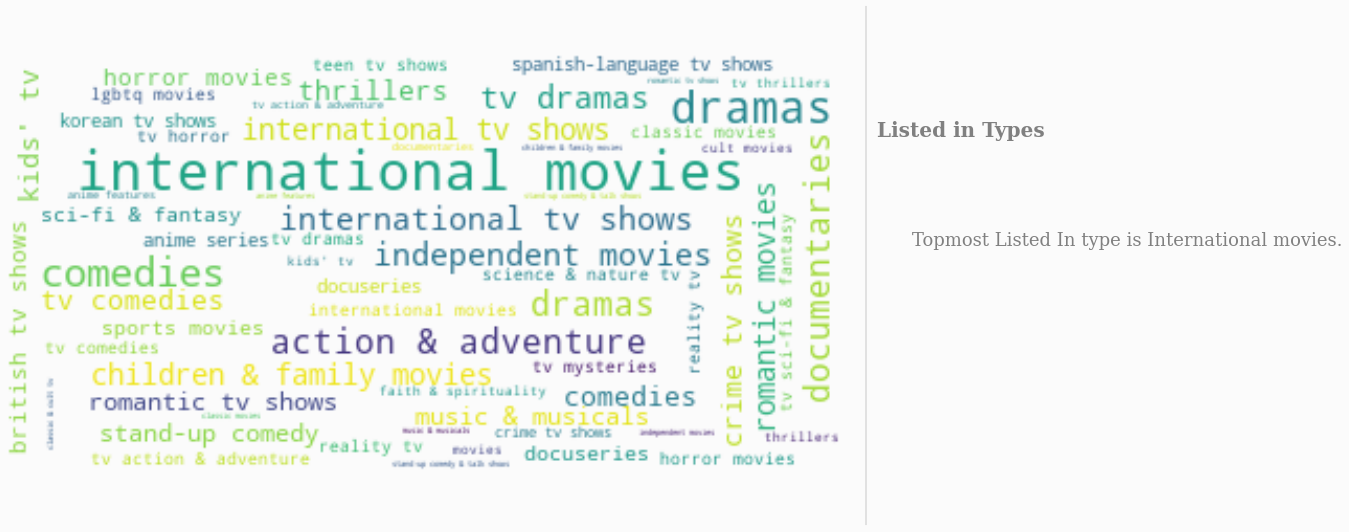

In [24]:
listed_in=df_input.listed_in.copy()
listed_in=listed_in.apply(lambda x: x.strip().lower())
listed_in_list=[]
for item in listed_in:
    listed_in_list.extend(item.split(','))
listed_in_list=list(set(listed_in_list))
print (f"Number of listed_in :{len(listed_in_list)}")

listed_in_dict={}
for listed in listed_in_list:
    listed_in_dict[listed]=0
for item in listed_in:
    for x in item.split(','):
        listed_in_dict[x]+=1
listed_in_count=pd.Series(listed_in_dict)        
listed_in_count.sort_values(ascending=False,inplace=True)

#Now generate word cloud
wc=WordCloud(background_color=background_color).generate_from_frequencies(listed_in_dict)

fig=plt.figure(figsize=(15,9),facecolor=None)
gs= fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.5)
ax0=fig.add_subplot(gs[0,0])
ax0.set_facecolor(background_color)
ax0.imshow(wc,interpolation='bilinear')
ax0.axis('off')
#Draw a seperation line
l1=lines.Line2D([0.92,0.92],[0.1,0.9], transform=fig.transFigure,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(x=0.93,y=0.7,
         s="Listed in Types",
         fontsize=20,fontfamily='serif',color='grey',fontweight='bold')
fig.text(x=0.92,
        y=0.5,
        fontweight='light',
        fontfamily='serif',
        fontsize=18,
        color='grey',
        s='''
        Topmost Listed In type is International movies.
        ''')
fig.tight_layout(pad=0)
fig.patch.set_facecolor(background_color)
plt.show()

### 12. Description

In [25]:
df_input.description

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7787, dtype: object

## <center> Feature Relationships</center>

### 1. Director and Type
#### 1a. Which director directed maximum movie contents in India?

In [26]:
df=df_input.loc[:,["director","country","type"]].copy()
df.dropna(subset=["director"],inplace=True)
# group the data by type which having two values - movie and TV Show
grouped=df.groupby(['type'])
# Let's find the movie group
df_type=grouped.get_group('Movie')
# Select for the country, for e.g India
df_country=df_type[df_type["country"]=="India"]
display (df_country.value_counts().head(1))

director      country  type 
David Dhawan  India    Movie    9
dtype: int64

#### 1b. Which director directed maximum TV serials in India?

In [27]:
df_type=grouped.get_group('TV Show')
df_country=df_type[df_type["country"]=="India"]
display (df_country.value_counts().head(1))

director     country  type   
Vijay Roche  India    TV Show    1
dtype: int64

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    Director 'David Dhawan' is the one who directed 9 Movies in India.
    </h4>

### 2. Cast and Type

In [28]:
del(df,df_type)

In [29]:
#Create dataframe with cast,country and type
df=df_input.loc[:,["cast","country","type"]].copy()
df.dropna(subset=["cast","country"],inplace=True)

#Create new data frame with case,country and type for processing purpose
df1 = pd.DataFrame(columns=["cast","country","type"])

# Insert values in the new data frame, with individual cast names in cast columns
# so that every row contains one cast per country.
for rec in tqdm(df.iterrows()):
    cast_names =rec[1]["cast"]
    for name in cast_names.split(','):
        df1=pd.concat([df1,
                      pd.DataFrame(data=
                        {"cast":name,
                         "country":rec[1]["country"],
                         "type":rec[1]["type"]},
                        index=[0])])
df1.reset_index(drop=True,inplace=True)

# Filter the values based on country name, e.g India
df_cast=df1[df1["country"]=="India"]
# create groups based on type
grouped=df_cast.groupby("type")
# Lets find data based on Movie type
df_type=grouped.get_group('Movie')
print ("\nCast names based on Movies:\n")
display(df_type.value_counts().head(3))
#Let's find data based in type TV show
df_type=grouped.get_group('TV Show')
print ("\nCast based on TV shows:\n")
display(df_type.value_counts().head(3))
del(df,df1,df_cast,df_type,grouped)

6658it [01:33, 71.45it/s] 


Cast names based on Movies:



cast            country  type 
 Anupam Kher    India    Movie    35
Shah Rukh Khan  India    Movie    25
 Om Puri        India    Movie    23
dtype: int64


Cast based on TV shows:



cast            country  type   
 Rajesh Kava    India    TV Show    3
 Nishka Raheja  India    TV Show    3
 Aahana Kumra   India    TV Show    2
dtype: int64

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    In India: <br>
    Anupam kher acted maximum of 35 movies.<br>
    Rajesh Kava and Nishka Raheja acted in maximum (3) TV shows.
    </h4>

### 3. Type and Country

In [30]:
df = df_input.loc[:,["type","country"]].copy()
df.dropna(inplace=True)
df["country"]=df["country"].apply(lambda x: x.lower().strip())

#New dataframe for processing purpose
df1 = pd.DataFrame(columns=["type","country"])

for rec in tqdm(df.iterrows()):
    country_names = rec[1]["country"]
    type_name=rec[1]["type"]
    for name in country_names.split(','):
        df1=pd.concat([df1,
                      pd.DataFrame(data={"type":type_name,
                                        "country":name},
                                  index=[0])])
df1.reset_index(drop=True,inplace=True);

#get top ten counry names from earlier country count
top_ten_countries=country_count.index.tolist()[:10]

#Filtering data only with top 10 countries
df2=df1[df1["country"].isin (top_ten_countries) ].copy()

7280it [00:07, 928.20it/s]


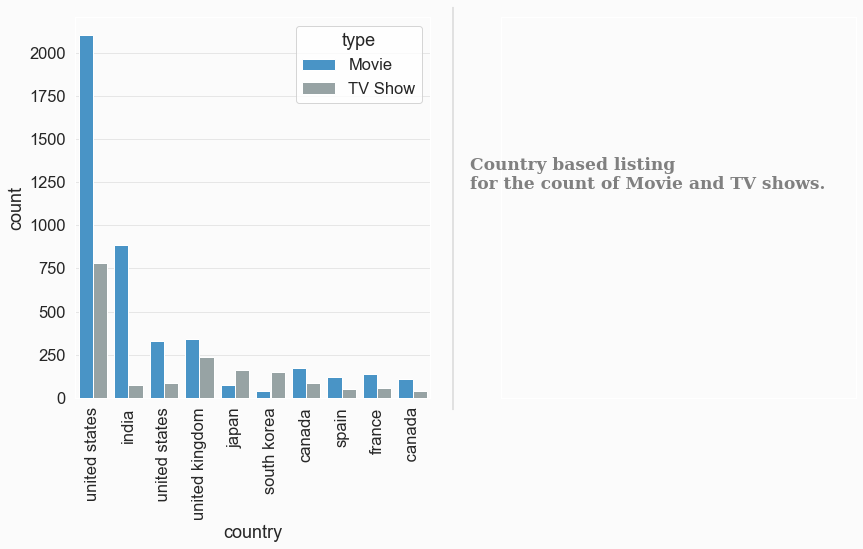

In [31]:
fig=plt.figure(figsize=(14,7));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

#Plot the countplot
sns.countplot(data=df2,x="country",hue="type",ax=ax0);

#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    

#Draw line in the middle    
l1= lines.Line2D([0.5,0.5],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#text content
fig.text(x=0.47,
        y=0.5,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Country based listing  
        for the count of Movie and TV shows.
        ''')
plt.show()

In [32]:
del(df1,df2,df,df_country)

### 4. Director and Cast

In [33]:
df=df_input.loc[:,["director","cast"]].copy()
df.dropna(axis=0,inplace=True);
df["cast"]=df["cast"].apply(lambda x: x.lower().strip())
df1=pd.DataFrame(columns=["director","cast"])

In [34]:
#Create a new data frame which contains unique director and unique actor per row.
for rec in tqdm(df.iterrows()):
    director=rec[1]["director"]
    cast_list=rec[1]["cast"]
    for individual_cast in cast_list.split(','):
        df1=pd.concat([df1,
                     pd.DataFrame(data={'director':director,
                                       'cast':individual_cast},
                                 index=[0])])
df1.reset_index(drop=True, inplace=True)
#View the statistics    
df2=df1.value_counts().to_frame()
df2.reset_index(inplace=True)
display(df2.head(15))

4979it [00:46, 107.89it/s]


,director,cast,0
0,S.S. Rajamouli,prabhas,7
1,S.S. Rajamouli,sathyaraj,7
2,S.S. Rajamouli,nassar,7
3,S.S. Rajamouli,ramya krishnan,7
4,S.S. Rajamouli,rana daggubati,7
5,S.S. Rajamouli,anushka shetty,7
6,S.S. Rajamouli,tamannaah bhatia,7
7,Cathy Garcia-Molina,joross gamboa,6
8,David Dhawan,anupam kher,6
9,Sooraj R. Barjatya,alok nath,5


In [35]:
#Incase we need to double check the actual data

#
#with option_context('display.max_colwidth',400):
#    display(df_input[df_input['director']=='Cathy Garcia-Molina'].loc[:,['type','director','cast','title']])

In [36]:
del(df,df1)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    From the dataset, there are maximum of 6 movies where directors would like to work with specific actor/actress.
    </h4>

### 5. Cast and Rating

In [37]:
df = df_input.loc[:,['cast','rating']].copy()
df.dropna(axis=0,inplace=True)
df["cast"]=df["cast"].apply(lambda x: x.lower().strip())
#New dataframe for processing purpose
df1=pd.DataFrame(columns=["rating","cast"])
#Insert a new data frame which contains unique director and unique actor per row.
for rec in tqdm(df.iterrows()):
    rating=rec[1]["rating"]
    cast_list=rec[1]["cast"]
    for individual_cast in cast_list.split(','):
        df1=pd.concat([df1,
        pd.DataFrame(data={'rating':rating,
                           'cast':individual_cast},
                           index=[0])])
df1.reset_index(drop=True, inplace=True)
#New data frame stores the value counts
df2=df1.value_counts().to_frame()
df2.reset_index(inplace=True)
df2.rename(columns={0:'counts'},inplace=True)


7062it [01:13, 95.79it/s] 


In [38]:
#Find which actor acted maximum videos with rating TV-MA
display(df2[df2["rating"]=="TV-MA"].head(5))

,rating,cast,counts
10,TV-MA,takahiro sakurai,14
20,TV-MA,robb wells,12
24,TV-MA,yuki kaji,11
40,TV-MA,seema biswas,10
45,TV-MA,miyuki sawashiro,10


In [39]:
del(df,df1,df2)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
Actor Takahiro Sakurai is the person who acted in highest numbers of 'TV-MA' rated contents.
    </h4>

### 6. Release year, Year added

In [40]:
df=df_input.loc[:,['country','release_year','date_added']].copy()
df.dropna(axis=0,inplace=True)
df['added_date']=df['date_added'].apply(lambda x: datetime.datetime.strptime(x.strip(), "%B %d, %Y"))
df['added_year']=df['added_date'].apply(lambda x: x.year)
df['year_difference'] =  df['added_year']-df['release_year']
df.drop(columns=['date_added','added_date','added_year','release_year'],inplace=True)

df1 = pd.DataFrame(columns=["country","year_difference"])

#Insert a new data frame which contains unique director and unique actor per row.
for rec in tqdm(df.iterrows()):
    country_list = rec[1]["country"]
    for country_name in country_list.split(','):
        df1 = pd.concat([df1,
                        pd.DataFrame(data={'country': country_name,
                                          'year_difference': rec[1]['year_difference']},
                                    index=[0])])
# Make sure that year_difference column is numeric so that we can process aggregations
df1['year_difference']=pd.to_numeric(df1['year_difference'])


7271it [00:11, 610.61it/s]


In [41]:
# df1=df1.groupby(['country'],as_index=False).agg({'year_difference':['mean']})   #for checking only mean
df2=df1.groupby(['country'],as_index=False).agg({"year_difference":[min,max,'mean']})
display(df2.sort_values((('year_difference', 'mean')),ascending=False))

country year_difference          
                                 min max  mean
53     Liechtenstein              54  54  54.0
28      East Germany              49  49  49.0
105     West Germany              33  49  40.5
186     West Germany              40  40  40.0
172     Soviet Union              38  38  38.0
..               ...             ...  ..   ...
97            Uganda               0   0   0.0
13           Bermuda               0   0   0.0
98           Ukraine               0   0   0.0
35         Guatemala               0   0   0.0
19    Cayman Islands               0   0   0.0

[188 rows x 4 columns]

In [42]:
del(df,df1,df2)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    In the country Liechtenstein, there are video contents which added in netflix after 54 years, and that's the highest difference between release and added year.
    </h4>

### 7. Release count per month

In [43]:
df=df_input.loc[:,['date_added','country']].copy()
df.dropna(axis=0,inplace=True)
#Convert date from string format to datetime format
df['added_date']=df['date_added'].apply(lambda x: datetime.datetime.strptime(x.strip(), "%B %d, %Y"))
#Extract year and month
df['year_added'] = df['added_date'].apply(lambda x: x.year)
df['month_added'] = df['added_date'].apply(lambda x: x.month)
df.drop(columns=['date_added','added_date'],inplace=True)

In [44]:
#Create new dataframe and copy the structure
df1=pd.DataFrame(columns=df.columns)

In [45]:
#Get individual country names in each rows
for rec in tqdm(df.iterrows()):
    country_list = rec[1]['country']
    for country_name in country_list.split(','):
        df1=pd.concat([df1,
                      pd.DataFrame(data={'country':country_name,
                                        'year_added':rec[1].year_added,
                                        'month_added': rec[1].month_added},
                                  index=[0])])
#df1.month_added=df1.month_added.apply(lambda x: calendar.month_name[x])
df1.reset_index(inplace=True,drop=True)                

7271it [00:14, 492.41it/s]


In [46]:
#Group based on country
groupby=df1.groupby('country')
#Check for movie statistics for a specific country. eg: India
df_india=groupby.get_group('India')

In [47]:
#Aggregation process
df_india=df_india.groupby(['year_added','month_added']).agg({'month_added':'count'})
df_india.rename(columns={'month_added':'VideoCount'},inplace=True)
df_india.reset_index(inplace=True)
print ('Sample dataframe after aggregating the video added count based on year and month')
display (df_india.head())

Sample dataframe after aggregating the video added count based on year and month


,year_added,month_added,VideoCount
0,2016,7,2
1,2016,8,2
2,2016,10,2
3,2016,11,2
4,2016,12,4


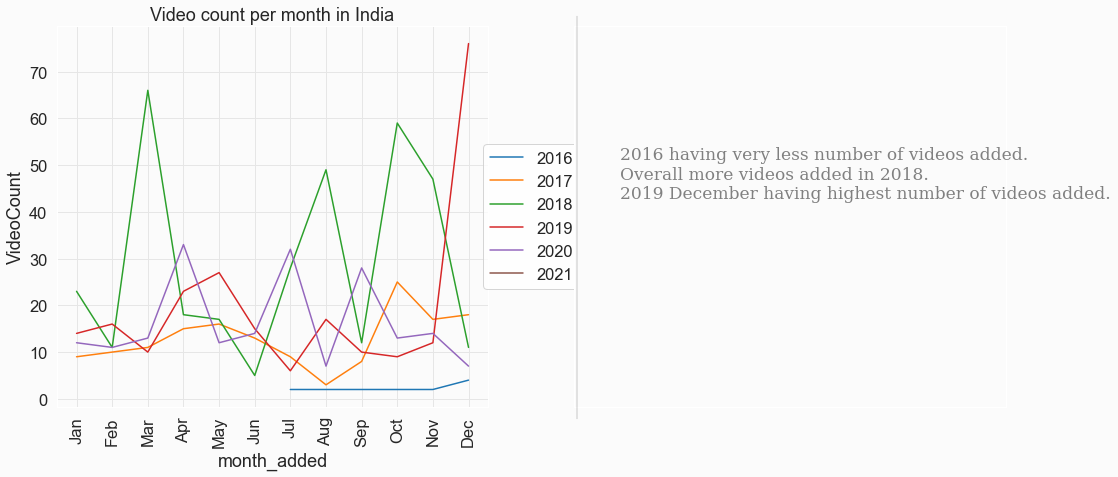

In [48]:
#Visualize data
fig=plt.figure(figsize=(17,7));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

#Plot the countplot
sns.lineplot(data=df_india,x="month_added",y="VideoCount",hue="year_added",ax=ax0,palette='tab10').set_title('Video count per month in India')
ax0.legend(loc='center', bbox_to_anchor=(1.1, 0.5))
ax0.set_xticks(np.arange(1,13))
ax0.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    

#Draw line in the middle    
l1= lines.Line2D([0.55,0.55],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#text content
fig.text(x=0.55,
        y=0.5,
        fontweight='light',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        2016 having very less number of videos added.
        Overall more videos added in 2018.
        2019 December having highest number of videos added.
        ''')
plt.show()

In [49]:
del([df,df_india,df1])